# 04 Simple Linear Regression dengan Scikit-Learn

Reff : [Simple Linear Regresion](https://en.wikipedia.org/wiki/Simple_linear_regression)

Sample Dataset

In [1]:
import pandas as pd

pizza = {'diameter': [6, 8, 10, 14, 18], 
         'harga': [7, 9, 13, 17.5, 18]}

pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


**Visualisasi Data**
- Menggunakan Scatter Plot dengan jangkauan maksimal 25

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


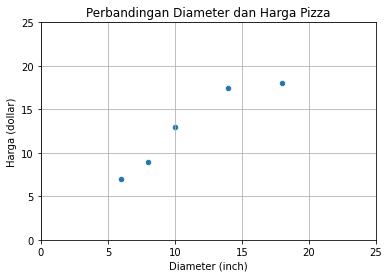

In [2]:
import matplotlib.pyplot as plt

pizza_df.plot(kind='scatter', x='diameter', y='harga')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

# Simple Linear Regression Model

**Dataset**
- Features dan target dapat dikelompokan menggunakan function np.array()
- Array pada diameter masih berbentuk 1 dimensi, maka akan kita ubah menjadi 2 dimensi dengan function reshape()

In [3]:
import numpy as np

X = np.array(pizza_df['diameter'])
y = np.array(pizza_df['harga'])

print(f'X: {X}')
print(f'y: {y}')

X: [ 6  8 10 14 18]
y: [ 7.   9.  13.  17.5 18. ]


In [4]:
X = X.reshape(-1, 1)
X.shape

(5, 1)

In [5]:
X

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]])

**Training Simple Linear Regression Model**

Untuk membuat Object Simple Linear Regression model kita dapat menggunakan LinearRegression() dengan menggunakan method fit()
- Nilai Features dapat diisi pada parameter 1
- Nilai Target dapat diisi pada parameter 2

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

**Visualisasi Simple Linear Regression Model**
- Membuat ploting dengan panjang 25 dan menggunakan function reshape() untuk menampung fungsi features.
- Untuk nilai target gunakan function predict().
- Untuk plot gunakan fungsi plt.scatter() dan untuk menampilkan garis menggunakan fungsi plt.plot().
- Fungsi plt.xlim/ .ylim digunakan untuk membatasi plot.
- Untuk menampilkan nilai intercept dapat menggunakan .intercept_ dan .coef_ untuk slope.

In [7]:
X_vis = np.array([0, 25]).reshape(-1, 1)
y_vis = model.predict(X_vis)

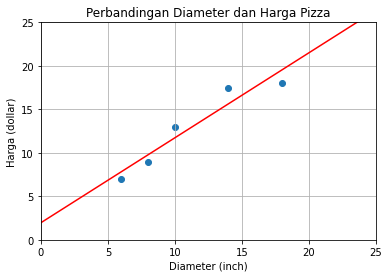

In [8]:
plt.scatter(X, y)
plt.plot(X_vis, y_vis, '-r')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

In [9]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')

intercept: 1.965517241379315
slope: [0.9762931]


**Mencari nilai Slope**
- Untuk mengkonversi array 2 dimensi menjadi 1 dimensi gunakan fungsi flatten().

In [11]:
print(f'X:\n{X}\n')
print(f'X flatten: {X.flatten()}\n')
print(f'y: {y}')

X:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

X flatten: [ 6  8 10 14 18]

y: [ 7.   9.  13.  17.5 18. ]


Variance
- Untuk menghitung nilai variance dapt menggunakan fungsi np.var().
- Parameter 2 berisi degree of freedem

Covariance
- Untuk menghitung nilai covariance dapt menggunakan fungsi np.cov().
- Parameter 2 diisi dengan nilai y
- Untuk menentukan covarience yang akan kita gunakan dapat menggunakan notasi index/ [...]

In [12]:
np.cov(X.flatten(), y)

array([[23.2 , 22.65],
       [22.65, 24.3 ]])

In [13]:
covariance_xy = np.cov(X.flatten(), y)[0][1]

print(f'covariance: {covariance_xy}')

covariance: 22.650000000000002


**Mencari nilai intercept**
- Nilai intercept merupakan hasil dari nilai rata-rata target dikurangi slope dikasli rata-rata features

In [14]:
intercept = np.mean(y) - slope * np.mean(X)

print(f'intercept: {intercept}')

NameError: ignored

**Prediksi Harga Pizza**
- Membuat prediksi harga pizza dengan diameter 12, 20, 23
- Melakukan prediksi dengan memanggil fungsi model.predict()

In [15]:
diameter_pizza = np.array([12, 20, 23]).reshape(-1, 1)
diameter_pizza

array([[12],
       [20],
       [23]])

In [16]:
prediksi_harga = model.predict(diameter_pizza)
prediksi_harga

array([13.68103448, 21.49137931, 24.42025862])

In [17]:
for dmtr, hrg in zip(diameter_pizza, prediksi_harga):
    print(f'Diameter: {dmtr} predilsi harga: {hrg}')

Diameter: [12] predilsi harga: 13.681034482758621
Diameter: [20] predilsi harga: 21.491379310344826
Diameter: [23] predilsi harga: 24.42025862068965


**Evaluasi Simple Linear Regression Model**
- Membuat training dan testing dataset untuk setiap target dan features

In [18]:
X_train = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
y_train = np.array([7, 9, 13, 17.5, 18])

X_test = np.array([8, 9, 11, 16, 12]).reshape(-1, 1)
y_test = np.array([11, 8.5, 15, 18, 11])

**Training Simple Linear Regression Model**
- Untuk membuat object Simple Linear Regression Model, gunakan fungsi LinearRegression().
- Lakukan training dengan method fit().
- Parameter 1 diisi dengan nilai features.
- Parameter 2 diisi dengan nilai target.

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Evaluasi Linear Regression Model dengan Coefficient of Determination atau R-squared**

Reff : [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)

- R-squared digunakan untuk mengevaluasi LinearRegressionModel object
- Prediksi nilai features untuk mendapatkan nilai target
- Bandingkan nilai target dan nilai prediksi menggunakan fungsi score().

In [20]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')

R-squared: 0.6620052929422553


# Mencari nilai R-squared

In [21]:
ss_res = sum([(y_i - model.predict(x_i.reshape(-1, 1))[0])**2
              for x_i, y_i in zip(X_test, y_test)])

print(f'ss_res: {ss_res}')

ss_res: 19.1980993608799


In [22]:
mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])

print(f'ss_tot: {ss_tot}')

ss_tot: 56.8


In [23]:
r_squared = 1 - (ss_res / ss_tot)

print(f'R-squared: {r_squared}')

R-squared: 0.6620052929422553
